# Исследование сервиса аренды самокатов.

**Цель исследования:** 
- определить типичное поведение пользователей сервиса и их характеристики;
- оценка гипотез,описывающих преимущества для бизнеса увеличения кол-ва пользователей с подпиской, для проведения рекламных кампаний;
- оценить вероятность конкретных целевых показателей при проведении рекламных кампаний


 Перед нами данные сервиса аренды самокатов GoFast о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируем данные и проверим некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:\
без подписки:
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;

с подпиской Ultra:
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

**Ход исследования:**
В основных данных есть информация о пользователях, их поездках и подписках.\
Пользователи — users_go.csv:
- user_id - уникальный идентификатор пользователя
- name - имя пользователя
- age - возраст
- city - город
- subscription_type - тип подписки (free, ultra)

Поездки — rides_go.csv:
- user_id - уникальный идентификатор пользователя
- distance	- расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration	- продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date	- дата совершения поездки

Подписки — subscriptions_go.csv:
- subscription_type	- тип подписки
- minute_price - стоимость одной минуты поездки по данной подписке
- start_ride_price - стоимость начала поездки
- subscription_fee - стоимость ежемесячного платежа
Ничего не известно о качестве данных, поэтому для начала мы проверим их на пропуски, поиск дубликатов, аномалии и верный тип данных. Перед исследовательским анализом и оценкой гипотез добавим расчетные столбцы, а также объединим полученные из разных датасетов данные. \


Анализ будет включать в себя следующие этапы:
- Загрузка и обзор данных
- Предобработка
- Исследование данных о пользователях  поездках
- Объединение данных
- Расчет выручки по пользователям с подпиской и без
- Оценка гипотез о преимуществах подписки ultra 
- Целевые показатели для рекламных кампаний (оценка вероятностей)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Объединение-данных" data-toc-modified-id="Объединение-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Объединение данных</a></span></li><li><span><a href="#Подсчёт-выручки" data-toc-modified-id="Подсчёт-выручки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подсчёт выручки</a></span></li><li><span><a href="#Шаг-6.-Проверка-гипотез" data-toc-modified-id="Шаг-6.-Проверка-гипотез-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Шаг 6. Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Тратят-ли-пользователи-с-подпиской-больше-времени-на-поездки?" data-toc-modified-id="Тратят-ли-пользователи-с-подпиской-больше-времени-на-поездки?-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Тратят ли пользователи с подпиской больше времени на поездки?</a></span></li><li><span><a href="#Можно-ли-сказать,-что-расстояние,-которое-проезжают-пользователи-с-подпиской-за-одну-поездку,-оптимальное-с-точки-зрения-износа-самоката?" data-toc-modified-id="Можно-ли-сказать,-что-расстояние,-которое-проезжают-пользователи-с-подпиской-за-одну-поездку,-оптимальное-с-точки-зрения-износа-самоката?-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, оптимальное с точки зрения износа самоката?</a></span></li><li><span><a href="#Ежемесячная-выручка-от-пользователей-с-подпиской-и-без." data-toc-modified-id="Ежемесячная-выручка-от-пользователей-с-подпиской-и-без.-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Ежемесячная выручка от пользователей с подпиской и без.</a></span></li></ul></li><li><span><a href="#Распределения" data-toc-modified-id="Распределения-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Распределения</a></span><ul class="toc-item"><li><span><a href="#Акция-с-раздачей-промокодов-на-один-бесплатный-месяц-подписки" data-toc-modified-id="Акция-с-раздачей-промокодов-на-один-бесплатный-месяц-подписки-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Акция с раздачей промокодов на один бесплатный месяц подписки</a></span></li><li><span><a href="#Push-уведомления-в-мобильном-приложении" data-toc-modified-id="Push-уведомления-в-мобильном-приложении-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Push-уведомления в мобильном приложении</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

#### Загрузка данных

In [2]:
try:
    users = pd.read_csv('/datasets/users_go.csv')
except:
    users = pd.read_csv('https://__________.csv')

In [3]:
try:
    rides = pd.read_csv('/datasets/rides_go.csv')
except:
    rides = pd.read_csv('https://__________.csv')

In [4]:
try:
    subscr = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    subscr = pd.read_csv('https://___________.csv')

In [5]:
users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [6]:
rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [7]:
subscr.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


В таблице с подписками всего две строчки непосредственно с типами подписок, колонки содержат также тариф за минуту, стоимость начала поездки и стоимость подписки.

Мы получили данные по сервису аренды самокатов GoFast. Датафрейм users содержит информация о пользователях сервиса - их id, имя, возраст, город проживания и тип подписки. В датафрейме rides информация по каждой поездке пользователя - ее продолжительности и дистанции. В таблице subscr данные о существующих тарифах - это тариф по подписке ультра или же без подписки.

Посмотрим общую информацию по полученным датасетам.

In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


В таблице по пользователям 1565 строк и 4 столбца, наименование столбцов записано с учетом змеиного регистра и не требует корректировки, нулевых значений не найдено. Необходимо "тип подписки" изменить на категориальные данные, т.к. столбец имеет только два значения.

In [9]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


В таблице с поездками имеем 18068 строчек, пропусков не обнаружено, а также 4 колонки (записанные змеиным регистром и не требующих правки названий). А вот тип данных нужно исправить - графу с датами поездок перевести в тип datetime.

#### Предобработка данных

Как писали ранее, в датафрейме users необходимо тип подписки изменить на категориальные данные для экономии памяти.

In [10]:
users['subscription_type'] = users['subscription_type'].astype('category')

В датафрейме rides приведем столбец date к соответсвующему значению.

In [11]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

Теперь проверим, есть ли явные дубликаты.

In [12]:
users.duplicated().sum()

31

Найдены дубликаты  в датафрейме users, уберем их.

In [13]:
users=users.drop_duplicates().reset_index(drop=True)

Теперь проверим таблицу по поездкам на дубликаты:

In [14]:
rides.duplicated().sum()

0

Явных дубликатов тут не обнаружено.

Поверим, нет ли дубликатов в названиях городов.

In [15]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Неявных дубликатов в названиях нет. Также для дальнейшего анализа нам потребуется столбец с номером месяца. Для начала проверим за какой период  имеются данные в таблице.

In [16]:
rides['date'].sort_values()

0       2021-01-01
13113   2021-01-01
5445    2021-01-01
12775   2021-01-01
17096   2021-01-01
           ...    
15325   2021-12-30
7541    2021-12-30
6115    2021-12-30
10991   2021-12-30
11778   2021-12-30
Name: date, Length: 18068, dtype: datetime64[ns]

Таблица содержит данные о поездках за 1 год (2021), поэтому для создания нового столбца можем воспользоваться DatetimeIndex().month:

In [17]:
rides['month'] = pd.DatetimeIndex(rides['date']).month

In [18]:
# код ревьюера
pd.DatetimeIndex(rides['date']).year.unique()

Int64Index([2021], dtype='int64', name='date')

Проверим изменения.

In [19]:
users.info()
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   user_id            1534 non-null   int64   
 1   name               1534 non-null   object  
 2   age                1534 non-null   int64   
 3   city               1534 non-null   object  
 4   subscription_type  1534 non-null   category
dtypes: category(1), int64(2), object(2)
memory usage: 49.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory us

Итак, мы изменили типы данных для дальнейшего удобства в работе - для таблицы с пользователями типы подписки изменили на категориальные данные, для таблицы с поездками - изменили тип данных для дат и добавили новый столбец с номером месяца. Также мы исключили дубликаты и добавили новый столбец с месяцем поездки.

#### Исследовательский анализ данных

Рассмотрим поподробнее и опишем данные.

In [20]:
rides.describe()

,user_id,distance,duration,month
count,18068.000000,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011,6.486772
std,434.734317,1116.831209,6.091051,3.437410
min,1.000000,0.855683,0.500000,1.000000
25%,487.000000,2543.226360,13.597563,4.000000
50%,889.000000,3133.609994,17.678395,6.000000
75%,1213.250000,3776.222735,21.724800,9.000000
max,1534.000000,7211.007745,40.823963,12.000000


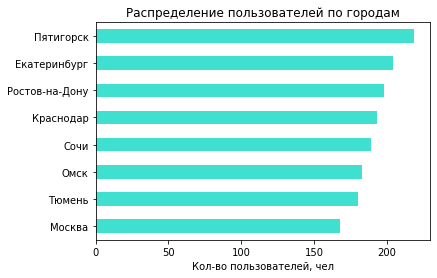

In [21]:
users['city'].value_counts().sort_values().plot(kind='barh', color='turquoise', legend=False)
plt.title('Распределение пользователей по городам')
plt.xlabel('Кол-во пользователей, чел')
plt.show()

Из 1,5 тыс. пользователей больше всего находится в Пятигорске (более 200 чел), наименьшее количество пользователей сервиса в Москве (менее 170 чел).

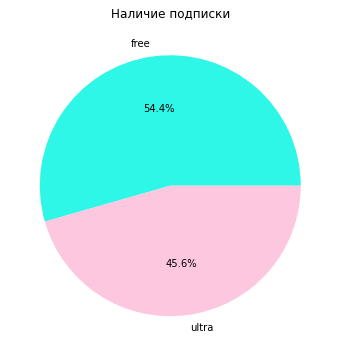

In [22]:
users.pivot_table(
    index = 'subscription_type', values = 'user_id', aggfunc = 'count'
    ).plot(
    y = 'user_id', kind='pie', figsize=(8, 6), colors = ["#2ef7e7", "#fdc8df",], legend =False,  autopct='%1.1f%%'
)
plt.axis('off')
plt.title('Наличие подписки')
plt.show()

Из диаграммы видно, что большая часть пользователей (54%) не аквтивируют подписку ultra. Рассмотрим как ситуация обстоит по городам.

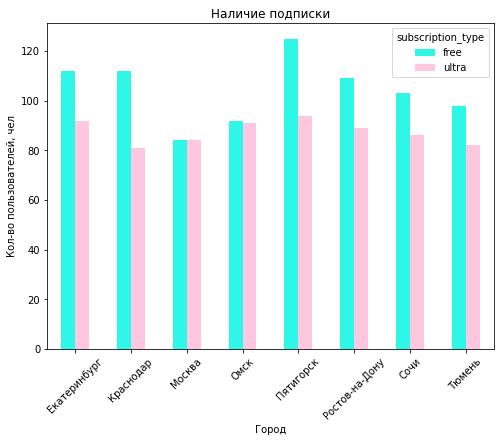

In [23]:
users.pivot_table(
    index = 'city', columns = 'subscription_type', values = 'user_id', aggfunc = 'count'
    ).plot(
    kind='bar', figsize=(8, 6),  color = ["#2ef7e7", "#fdc8df",]
)
plt.title('Наличие подписки')
plt.ylabel('Кол-во пользователей, чел')
plt.xlabel('Город')
plt.xticks(rotation=45)
plt.show()

Как мы можем наблюдать из групповой диаграммы, ситуация в разрезе городов примерно такая же - более половины пользователей не пользуются подпиской ультра. Поровну пользователей с подпиской и без только в Москве и Омске.

Рассмотрим подробнее возраст пользователей.

In [24]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

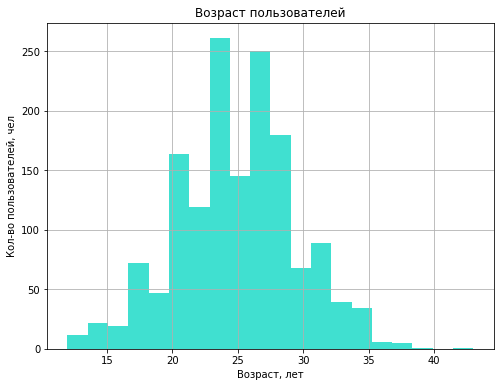

In [25]:
users['age'].hist(color='turquoise', bins=20,  figsize=(8, 6))
plt.title('Возраст пользователей')
plt.ylabel('Кол-во пользователей, чел')
plt.xlabel('Возраст, лет')
plt.show()

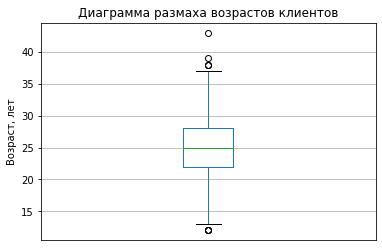

In [26]:
users['age'].plot(kind='box', grid=True)

plt.title('Диаграмма размаха возрастов клиентов')
plt.ylabel('Возраст, лет')
plt.xticks([])
plt.show()

Типичный пользователь имеет возраст 25 лет. Больше всего пользователей 24 и 26 лет. Самому молодому пользователю - 12, а самому взрослому - 43. Пользователи старше 37 и младше 17 не типичны для сервиса GoFast.

In [27]:
users.groupby('city').agg({'age':['median', 'min', 'max']})

age        
               median min max
city                         
Екатеринбург       25  13  35
Краснодар          25  13  38
Москва             25  13  43
Омск               26  13  38
Пятигорск          25  12  36
Ростов-на-Дону     25  12  37
Сочи               25  12  36
Тюмень             25  13  38

Возраст типичных пользователей сервиса по городам практически не отличается, а максимальный возраст у пользователя из Москвы.

Теперь посмотрим на расстояния, которые преодолевают пользователи самокатов.

In [28]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

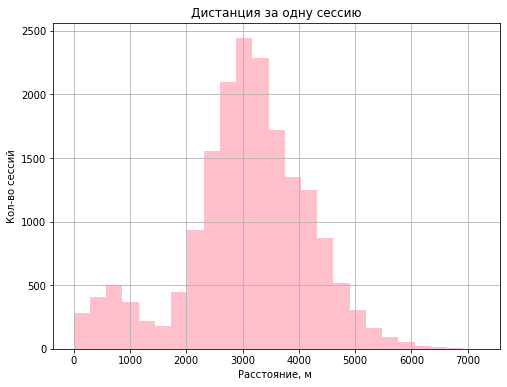

In [29]:
rides['distance'].hist(color='pink', bins=25,  figsize=(8, 6))
plt.title('Дистанция за одну сессию')
plt.ylabel('Кол-во сессий')
plt.xlabel('Расстояние, м ')
plt.show()

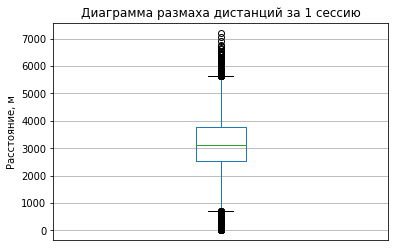

In [30]:
rides['distance'].plot(kind='box', grid=True)
plt.title('Диаграмма размаха дистанций за 1 сессию')
plt.ylabel('Расстояние, м')
plt.xticks([])
plt.show()

Типичный пользователь преодолевает за одну сессию растояние 3,1 км. Но есть также группа клиентов, использующая сервис на дистанции менее 830 м или более 5,5 км. Также в выгрузку вошли данные, когда пользователи останавливали сессию не преодолев и метра (околонулевые значения на диаграмме), что вероятно было вызвано неисправностью самоката.

In [31]:
rides.query('distance < 350').sort_values(by = 'distance')

,user_id,distance,duration,date,month
11555,1069,0.855683,10.001902,2021-01-31,1
9541,925,2.570787,3.011018,2021-10-19,10
13690,1223,4.329506,4.008958,2021-05-22,5
8658,861,6.784447,6.015656,2021-07-21,7
7841,796,7.097072,10.026614,2021-11-26,11
...,...,...,...,...,...
13359,1202,345.064400,3.766810,2021-03-17,3
16822,1444,345.511695,7.714852,2021-11-13,11
10243,974,347.455128,14.895210,2021-10-13,10
11285,1049,347.678098,10.227099,2021-12-05,12


Посмотрим на продолжительность поездок.

In [32]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

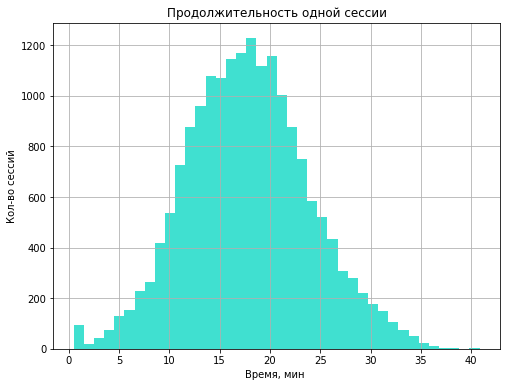

In [33]:
rides['duration'].hist(color='turquoise', bins=40,  figsize=(8, 6))
plt.title('Продолжительность одной сессии')
plt.ylabel('Кол-во сессий')
plt.xlabel('Время, мин ')
plt.show()

На графике наблюдаем пиковое значение около 0 с аномально короткими поездками. Выгрузим их отдельно.

In [34]:
rides.query('duration < 1')

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


In [35]:
rides.query('duration < 1')['duration'].unique()

array([0.5])

95 значений с достаточно большой дистанцией движения имеют аномально короткое удержание. Для анализа отсечем эти значения, а также потребуется дополнительно получить список самокатов из этих поездок для обнаружения неисправности. (а также сравнить со списком , выдающем анамально короткие дистанции).

In [36]:
rides = rides.query('duration > 1')
rides

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


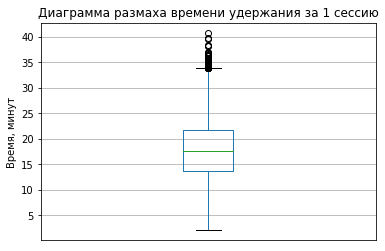

In [37]:
rides['duration'].plot(kind='box', grid=True)
plt.title('Диаграмма размаха времени удержания за 1 сессию')
plt.ylabel('Время, минут')
plt.xticks([])
plt.show()

Обычно продолжительность сессии составляет порядка 17,5 мин. Но есть и, описанные выше, короткие сессии менее полминуты, возможно связанные с неполадками или сбоем оплаты (мы убрали их из выборки). Продолжительность сессии более 35 мин также нетипична.

#### Объединение данных

Для того, чтобы получить больше информации о пользователях, объединим 3 датафрейма:

In [38]:
df = users.merge(rides, on = 'user_id', how = 'outer').merge(subscr, on = 'subscription_type', how = 'outer')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17973 entries, 0 to 17972
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17973 non-null  int64         
 1   name               17973 non-null  object        
 2   age                17973 non-null  int64         
 3   city               17973 non-null  object        
 4   subscription_type  17973 non-null  object        
 5   distance           17973 non-null  float64       
 6   duration           17973 non-null  float64       
 7   date               17973 non-null  datetime64[ns]
 8   month              17973 non-null  int64         
 9   minute_price       17973 non-null  int64         
 10  start_ride_price   17973 non-null  int64         
 11  subscription_fee   17973 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [40]:
df

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
17968,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
17969,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
17970,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
17971,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


Данные объединены, нулевых строк не найдено. Теперь выделим в отдельные датафреймы пользователей с подпиской и без.

In [41]:
free = df.query('subscription_type == "free"').reset_index(drop=True)

In [42]:
ultra = df.query('subscription_type == "ultra"').reset_index(drop=True)

Построим диаграммы по дистанциям и продолжительности сессии для пользователей без подписки и подпиской ultra.

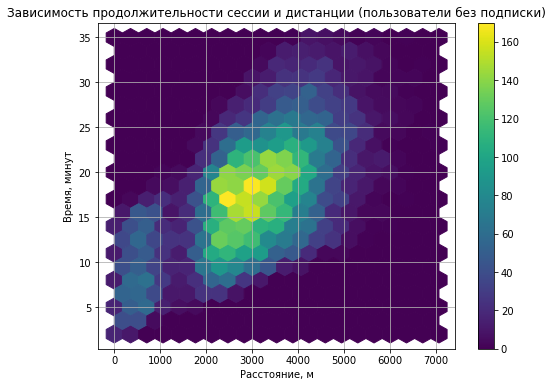

In [43]:
free.plot(x = 'distance', y='duration', kind='hexbin',gridsize=20, figsize=(8, 6), sharex=False, grid=True, cmap = 'viridis')
plt.title('Зависимость продолжительности сессии и дистанции (пользователи без подписки)')
plt.ylabel('Время, минут')
plt.xlabel('Расстояние, м')
plt.show()


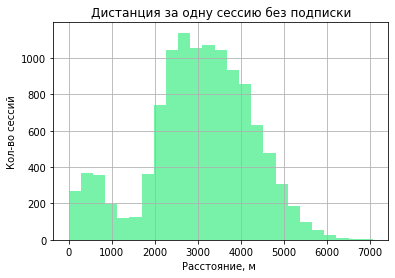

In [44]:
free['distance'].hist(color = '#79f2a9', bins = 25)
plt.title('Дистанция за одну сессию без подписки')
plt.ylabel('Кол-во сессий')
plt.xlabel('Расстояние, м ')
plt.show()

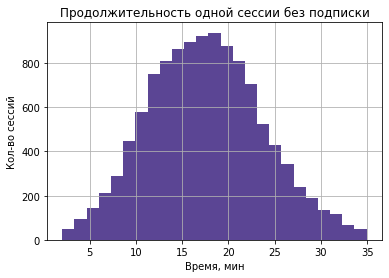

In [45]:
free['duration'].hist(color = '#5b4594', bins = 25)
plt.title('Продолжительность одной сессии без подписки')
plt.ylabel('Кол-во сессий')
plt.xlabel('Время, мин')
plt.show()

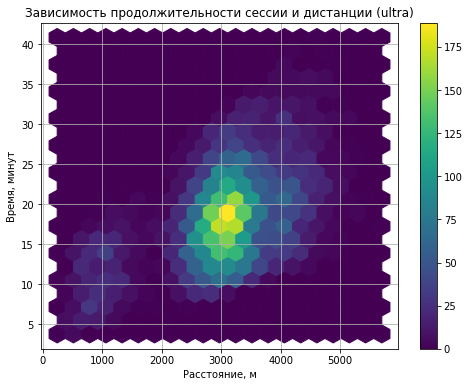

In [46]:
ultra.plot(x = 'distance', y='duration', kind='hexbin',gridsize=20, figsize=(8, 6), sharex=False, grid=True, cmap='viridis')
plt.title('Зависимость продолжительности сессии и дистанции (ultra)')
plt.ylabel('Время, минут')
plt.xlabel('Расстояние, м')
plt.show()

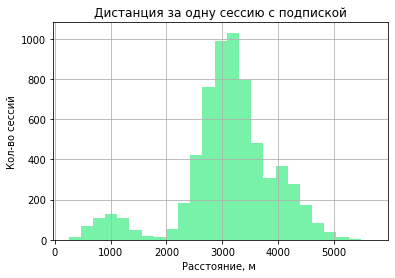

In [47]:
ultra['distance'].hist(color = '#79f2a9', bins = 25)
plt.title('Дистанция за одну сессию с подпиской')
plt.ylabel('Кол-во сессий')
plt.xlabel('Расстояние, м ')
plt.show()

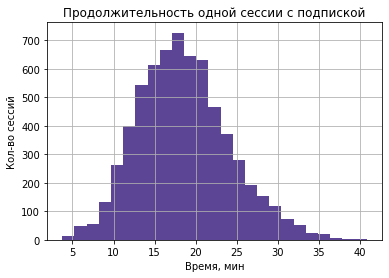

In [48]:
ultra['duration'].hist(color = '#5b4594', bins = 25)
plt.title('Продолжительность одной сессии с подпиской')
plt.ylabel('Кол-во сессий')
plt.xlabel('Время, мин')
plt.show()

In [49]:
free[['duration', 'distance']].describe()

,duration,distance
count,11473.000000,11473.000000
mean,17.530771,3028.374239
std,6.162609,1235.541051
min,2.035632,0.855683
25%,13.085688,2360.878149
50%,17.383807,3102.083025
75%,21.638038,3883.979311
max,34.948498,7066.003772


In [50]:
ultra[['duration', 'distance']].describe()

,duration,distance
count,6500.000000,6500.000000
mean,18.541985,3115.445388
std,5.572048,836.895330
min,3.760353,244.210438
25%,14.524654,2785.444017
50%,18.178153,3148.637229
75%,21.884129,3560.574425
max,40.823963,5699.769662


Теперь посмотрим на наложение распределений расстояний за 1 сессию в зависимости от типа подписки.

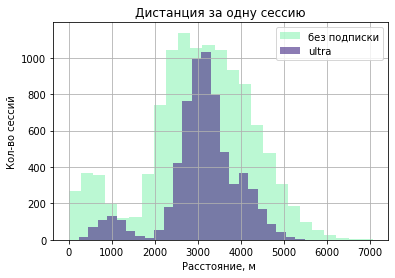

In [51]:
ax = free.plot(
    kind='hist',
    y = 'distance',
    bins=25,
    linewidth=5,
    color = '#79f2a9',
    alpha=0.5,
    label='без подписки',
     legend=True,
)
ultra.plot(
    kind='hist',
    y = 'distance',
    bins=25,
    linewidth=5,
    color = '#5b4594',
    alpha=0.7,
    label='ultra',
    ax=ax,
    grid=True,
    legend=True,
) 
plt.title('Дистанция за одну сессию')
plt.ylabel('Кол-во сессий')
plt.xlabel('Расстояние, м ')
plt.show()

Таким образом, пики распределения дистанций пользователей без подписки выше, также как и выше количество аномально коротких поездок.

Повторим эту операцию с <a id = 'link2'> продолжительностью </a> 1 сессию в зависимости от типа подписки.

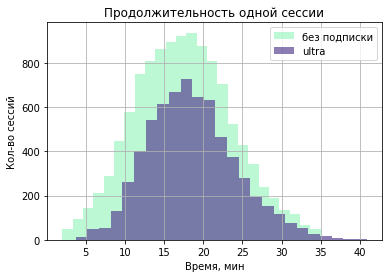

In [52]:
ax = free.plot(
    kind='hist',
    y = 'duration',
    bins=25,
    linewidth=5,
    color = '#79f2a9',
    alpha=0.5,
    label='без подписки',
     legend=True,
)
ultra.plot(
    kind='hist',
    y = 'duration',
    bins=25,
    linewidth=5,
    color = '#5b4594',
    alpha=0.7,
    label='ultra',
    ax=ax,
    grid=True,
    legend=True,
) 
plt.title('Продолжительность одной сессии')
plt.ylabel('Кол-во сессий')
plt.xlabel('Время, мин')
plt.show()

Медианные значения находятся примерно в одном положении , но в целом продолжительность поездок без подписки выше.

Таким образом, больше всего сессий совершено пользователями без подписки (11,5 тыс. против 6,5 тыс. поездок). Средння продолжительность поездок и дистанция практически одинаковы для этих двух групп пользователей (около 3100 км и 17,5 -18 минут). А вот ложных сессий (например продолжительностью в полминуты или с дистанцией менее 1 м) больше у пользователей без подписки (возможо стоит провести дополнительное исследование приложения совместно с ux-дизайнерами, чтобы избежать потери потенциальных клиентов, но при этом учесть опыт использования постоянных клиентов). \
Также стоит отметить, что поездки менее 1 км и короче 15 минут более характерны для пользователей без подписки.

#### Подсчёт выручки

 Найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц и добавим их в сводную таблицу вместе с тарифами.

In [53]:
df['duration'] = np.ceil(df['duration'])
df_agg = df.pivot_table(
    index=['user_id','month'],
    aggfunc={
        'distance':['sum', 'count'],
        'duration':'sum',
        'minute_price':'first',
        'start_ride_price':'first',
        'subscription_fee':'first'}).reset_index()
df_agg.columns = [
    'user_id','month',
    'session', 
    'total_distance',
    'total_duration', 
    'minute_price',
    'start_ride_price',
    'subscription_fee']
df_agg = df_agg.merge(
    df[['user_id', 'month','age', 'city', 'subscription_type']],
    on = ['user_id','month']).drop_duplicates().reset_index(drop=True)
df_agg.head()

,user_id,month,session,total_distance,total_duration,minute_price,start_ride_price,subscription_fee,age,city,subscription_type
0,1,1,2,7027.511294,42.0,6,0,199,22,Тюмень,ultra
1,1,4,1,754.159807,7.0,6,0,199,22,Тюмень,ultra
2,1,8,2,6723.470560,46.0,6,0,199,22,Тюмень,ultra
3,1,10,2,5809.911100,32.0,6,0,199,22,Тюмень,ultra
4,1,11,3,7003.499363,56.0,6,0,199,22,Тюмень,ultra


Посчитаем ежемесячную выручку по каждому пользователю.

In [54]:
df_agg['proceeds'] = df_agg['total_duration'] * df_agg['minute_price']\
+ df_agg['session']* df_agg['start_ride_price'] + df_agg['subscription_fee']
df_agg.head()

,user_id,month,session,total_distance,total_duration,minute_price,start_ride_price,subscription_fee,age,city,subscription_type,proceeds
0,1,1,2,7027.511294,42.0,6,0,199,22,Тюмень,ultra,451.0
1,1,4,1,754.159807,7.0,6,0,199,22,Тюмень,ultra,241.0
2,1,8,2,6723.470560,46.0,6,0,199,22,Тюмень,ultra,475.0
3,1,10,2,5809.911100,32.0,6,0,199,22,Тюмень,ultra,391.0
4,1,11,3,7003.499363,56.0,6,0,199,22,Тюмень,ultra,535.0


Посмотрим, среднемесячную выручку от пользователя с подпиской и без, а также общую выручку от этих двух групп пользователей.

In [55]:
df_agg.groupby('subscription_type').agg({'proceeds':['median', 'sum', 'count']})

proceeds                 
                    median        sum count
subscription_type                          
free                 274.0  2228594.0  6767
ultra                337.0  1644537.0  4533

Средняя выручка от пользователей с подпиской 337 руб., что больше, чем у пользователей без подписки ultra (274 руб.).

Также взглянем на распределение этих показателей по городам.

In [56]:
df_agg.groupby(['subscription_type','city']).agg({'proceeds':['median', 'sum', 'count']})

proceeds                
                                   median       sum count
subscription_type city                                   
free              Екатеринбург      274.0  306856.0   934
                  Краснодар         282.0  293350.0   880
                  Москва            290.0  227234.0   675
                  Омск              266.0  239158.0   743
                  Пятигорск         258.0  324302.0   994
                  Ростов-на-Дону    268.0  298800.0   908
                  Сочи              276.0  276934.0   847
                  Тюмень            274.0  261960.0   786
ultra             Екатеринбург      331.0  222613.0   619
                  Краснодар         337.0  195515.0   539
                  Москва            337.0  180703.0   499
                  Омск              331.0  209620.0   580
                  Пятигорск         337.0  215646.0   594
                  Ростов-на-Дону    331.0  220542.0   606
                  Сочи              331.0  203765.0   557
                  Тюмень            337.0  196133.0   539

Самая высокая среднемесячная выручка от пользователей без подписки в Москве, самая низкая в Пятигорске (где пользователей сервиса наибольшее количество и общая выручка самая высокая среди филиалов).

#### Шаг 6. Проверка гипотез

##### Тратят ли пользователи с подпиской больше времени на поездки?

Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Для этого проведем t-тест двух независимых выборок.
- H0 - пользователи с подпиской тратят столько же времени на поездки, сколько и пользователи без подписки;
- H1 - пользователи с подпиской тратят больше времени на поездки, чем  пользователи без подписки;

In [57]:
# выбираем уровень статистической значимости
alpha = 0.05
# h1 - пользователи с подпиской тратят больше времени


results = st.ttest_ind(df.query('subscription_type == "ultra"')['duration'],
                       df.query('subscription_type == "free"')['duration'],
                       alternative='greater')
print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований полагать, что пользователи с подпиской тратят больше времени на поездки')

p-value: 8.577910347796266e-28
Отвергаем нулевую гипотезу


Выведем медианное время у пользователей без подписки:

In [58]:
df_agg.query('subscription_type == "free"')['total_duration'].median()

26.0

и с подпиской ultra:

In [59]:
df_agg.query('subscription_type == "ultra"')['total_duration'].median()

23.0

Таким образом, несмотря на то, что среднее время поездки без подписки даже немного превышает время сессии пользователя с подпиской, t-test показывает, что клиенты с подпиской выгоднее, так как, вероятно тратят больше времени на поездки.

[ГИСТОГРАММА](#link2)

#####  Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, оптимальное с точки зрения износа самоката?

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Проверим гипотезу, что дистанция за одну сессию пользователя с подпиской не более этого растояния.

- H0 - расстояние, которое проезжают пользователи с подпиской за одну сессию, равно расстоянию в 3130 м.
- H1 - расстояние,  которое проезжают пользователи с подпиской за одну сессию, больше 3130 м.

In [60]:
optimal = 3130

alpha = 0.05
# h1 - пользователи с подпиской ultra преодолевают расстояние более 3130 за одну сессию.

results = st.ttest_1samp(ultra['distance'], optimal, alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Пользователи с подпиской ultra преодолевают расстояние   более 3130 м за одну сессию.')
else:
    print('Нет оснований отвергать нулевую гипотезу')


p-значение: 0.9195368847849785
Нет оснований отвергать нулевую гипотезу


P-value достаточно высоко, а значит нельзя отвергнуть гипотезу, что пользователи с подпиской преодолевают оптимальное расстояние.

##### Ежемесячная выручка от пользователей с подпиской и без.

Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

- H0 - ежемесячная выручка от пользователей с подпиской равна ежемесячной выручки пользователей без подписки
- H1 - ежемесячная выручка от пользователей с подпиской больше ежемесячной выручкипользователей без подписки

In [61]:
# выбираем уровень статистической значимости
alpha = 0.05
# h1 - выручка от пользователей с подпиской выше


results = st.ttest_ind(df_agg.query('subscription_type == "ultra"')['proceeds'],
                       df_agg.query('subscription_type == "free"')['proceeds'],
                       alternative='greater')
print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Ежемесячная выручка выше от пользователей с подпиской')
else:
    print('Нет оснований полагать, что пользователи с подпиской приносят больше выручки')

p-value: 2.0314113674863288e-30
Ежемесячная выручка выше от пользователей с подпиской


Медианная выручка от пользователей с подпиской в месяц:

In [62]:
df_agg.query('subscription_type == "ultra"')['proceeds'].median()

337.0

без подписки:

In [63]:
df_agg.query('subscription_type == "free"')['proceeds'].median()

274.0

Таким образом, и медианная выручка, и t-тест склоняет к версии о том, что пользователи с полпиской выгоднее для бизнеса.

***Вероятнее всего, пользователи с подпиской тратят больше времени на поездки и проезжают оптимальные дистанции с точки зрения износа самокатов. Также t-тестирование указывает на то, что ежемесячная выручка от пользователей с подпиской выше, что в свою очередь говорит о пользе продвижения ultra и подтверждает запросы продакт-менеджеров на проведение рекламных кампаний.***

#### Распределения

##### Акция с раздачей промокодов на один бесплатный месяц подписки

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясним, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберем параметры распределения, описывающего эту ситуацию, построим график распределения и сформулируем ответ на вопрос о количестве промокодов.

Используем биноминальное распределение, т.к именно оно описывает распределение вероятностей успеха/неудачи и подходит для дискретных величин. Математическое ожидание при таком распределении равно n*p (количество экспериментов на вероятность). Построим распределение для n =1000.

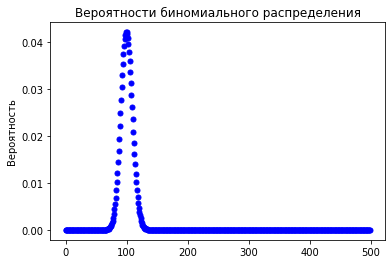

In [64]:
n = 1000
p = 0.1

# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x = list(range(0, 500))
# рисуем график биномиального распределения
ax = plt.subplot()
# используем синие о-образные маркеры и размер маркера 5
ax.plot(x, st.binom.pmf(x, n, p), 'bo', ms=5)
plt.title('Вероятности биномиального распределения')
plt.ylabel('Вероятность')
plt.show()

/opt/conda/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


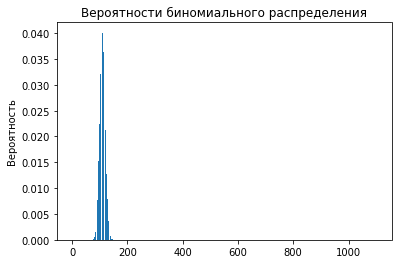

In [65]:
n= 1100
p= 0.1
distr = []

for k in range(0, n + 1):
    current_value = st.binom.pmf(k, n, p)
    distr.append(current_value)
    
plt.bar(range(0, n + 1), distr)
plt.title('Вероятности биномиального распределения')
plt.ylabel('Вероятность')
plt.show()

Посчитаем вероятность успеха для рассылки 1170 промокодов.

In [66]:
st.binom.cdf(k= 100 , n= 1170, p= 0.1 )

0.05151491673741622

Таким образом, разослав 1170 промокодов, вероятность невыполнить план будет примерно 5%.

##### Push-уведомления в мобильном приложении

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации построим примерный график распределения и оценим вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Решение описывается биноминальным распределением. Т.к. количество рассылок достаточно велико, воспользуемся нормальной аппроксимацией биномиального распределения.

In [67]:
from math import sqrt
n = 1000000 #рассылка
p = 0.4 # откроют

mu = n * p
sigma = sqrt(n * p * (1 - p))

distr = st.norm(mu, sigma)

result =distr.cdf(399501)
print(result)

0.15420132397643166


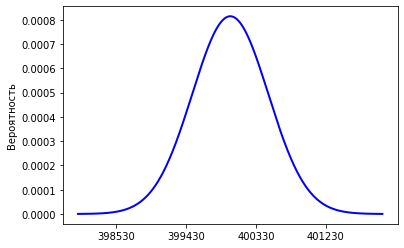

In [68]:
# зададим функцию, которая выдаёт <num> чисел,
# равномерно распределённых от <start> до <stop>
# (понадобится для визуализации нормального распределения)
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result
 
# задаём параметры биномиального распределения
n = 1000000
p = 0.4
# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# границы промежутка, в котором будем строить аппроксимацию -
# от n*p минус 4 ст.отклонения бином.распределения
# до n*p плюс 4 ст.отклонения бином.распределения
# (там, где вероятности значений почти не равны нулю)
left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))
 
# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x = list(range(max(0, left), right))


# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))
 
# рисуем график нормального распределения:
# получим список из 10000 чисел от left до right
x = linspace(left, right, 10000)

theplot = plt.subplot()
theplot.plot(x, st.norm.pdf(x, mu, sigma), 'b-', lw=2, label='плотность вероятности нормального распределения')
 
# зададим подписи по оси x в пределах ± 3 ст.отклонений от мат.ожидания
# (последний аргумент в методе range - интервал между подписями)
x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 900))
theplot.set_xticks(x_ticks)

plt.ylabel('Вероятность')
plt.show()

Таким образом, для того, что уведомление откроют не более 399,5 тыс равна 15%.

#### Вывод

В ходе предобработки данных были исключены дубликаты, исправлены типы данных и созданы вспомогательные столбцы. Сервис GoFast представлен в 8 городах России. Из `1,5 тыс. пользователей` больше всего находится в Пятигорске (более 200 чел), наименьшее количество пользователей сервиса в Москве (менее 170 чел). Более `54%` пользователей сервиса `не подключили подписку` ultra, причем ситуация похожа во всех городах присутствия.\
Типичные клиенты сервиса -это `молодые люди 25 лет`, а максимальный возраста не достигает в большинстве городов и 40 лет.

Среднее расстояние за `одну сессию - 3 км`, а продолжительность использования самоката за сеанс - `17,5 минут`. Средняя продолжительность и дистанция примерно одинаковы для обеих категорий пользователей. Больше всего сессий именно у пользователей без подписки (11,5 тыс. против 6,5 тыс. поездок), также как и ложных сессий продолжительностью менее минуты или с расстоянием до 1 метра. С этим еще предстоит разобраться, в чем кроется причина - проблемах с оплатой, неисправности самокатов, неудобном и непривычном приложении.

 Типичная `месячная выручка` от клиентов `с подпиской` ultra выше (337 руб. против 274), но при этом конечно же общая выручка больше от пользователей без подписки за счет их количества. Причем среднемесячный чек клиентов с подпиской не сильно различается в зависимости от города, а вот по пользователям  без подписки больше вариаций. Самый высокий среднемесячный чек без подписки по Москве, а вот общая выручка от клиентов без подписки выше в Пятигорске, Екатеринбурге, Ростове-на-Дону, Краснодаре (возможно для начала следует сосредоточится именно на этих городах в виду более низкой конкуренции, чем в Москве и большом количестве пользователей без подписки).

Проверка гипотез склоняет полагать, что `пользователи с подпиской тратят больше` времени на поездки. Также мы можем предположить с высокой вероятностью, что пользователи с подпиской преодолевают `оптимальное расстояние с точки зрения износа самоката` (3100м). Также ежемесячная выручка выше от пользователей с подпиской. Результаты t-тестирования говорят о пользе продвижения ultra и подтверждает запросы продакт-менеджеров на проведение рекламных кампаний. 

На основании полученных данных по вероятности продления подписки по промокоду с использованием биноминального распределения получили результат в 1170 `промокодов для рассылки` с целью продления ее 100 клиентами.\
Также мы пролучили, что при рассылке 1млн. push-уведомлений и 40% вероятности их прочтения пользователями вероятность открытия уведомления не более 399,5тыс.пользователей равна 15%.